In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Load image

In [6]:
image=cv2.imread('images/chessboard.jpg')

In [7]:
cv2.imshow('Show original image', image)
cv2.waitKey()
cv2.destroyAllWindows()

### Converto to gray/Apply Harris edge detection

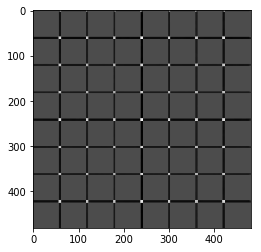

In [16]:
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
'''
cv2.cornerHarris(img, block size, ksize, k)

    img - Input image, it should be grayscale and float32 type.
    blockSize - It is the size of neighbourhood considered for corner detection
    ksize - Aperture parameter of Sobel derivative used.
    k - Harris detector free parameter in the equation (set to 0.1).
    
'''

corners=cv2.cornerHarris(image_gray,5,3,0.1)
plt.imshow(corners, cmap='gray')
plt.show()

### Extract and plot the corners

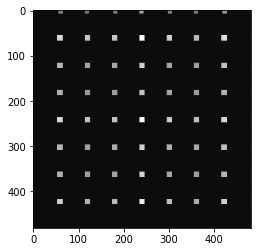

In [22]:
corners_dilate=cv2.dilate(corners,np.ones((8,8),np.uint8), iterations=1) ### plot corners over a 8*8 black matrix
plt.imshow(corners_dilate, cmap='gray')                          

In [24]:
image[corners_dilate > 0.1 * corners_dilate.max()]=[0,255,0] 

'''
Here we set the corner colors to green remeber [0,255,0]==green
If pixel value is greater than a threshold, return true and mark it as green
'''
cv2.imshow('Plot edge on image', image)
cv2.waitKey()
cv2.destroyAllWindows()

### Detect corners in an Truck Image(back of the truck)

In [17]:
image=cv2.imread('images/truck_back_color.jpg')

In [6]:
cv2.imshow('Truck image original', image)
cv2.waitKey()
cv2.destroyAllWindows()

### Convert image to grey

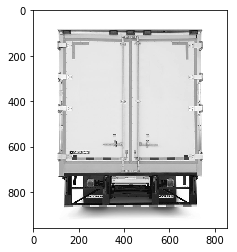

In [18]:
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [19]:
image_gray.shape

(958, 853)

### Perform Haris corner detection

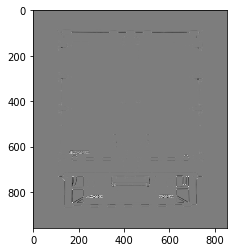

In [20]:
corners=cv2.cornerHarris(image_gray,5,3,0.1)
plt.imshow(corners, cmap='gray')
plt.show()

### Dilate the corners

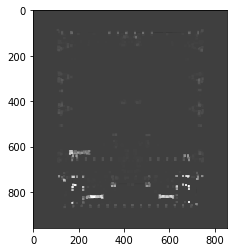

In [24]:
corners_dilate=cv2.dilate(corners,np.ones((8,8),np.uint8),iterations=1)
plt.imshow(corners_dilate,cmap='gray')

In [27]:
corners_dilate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
corners_dilate.shape

(958, 853)

In [31]:
corners_dilate.max()

0.025512483

In [40]:
corners_dilate[corners_dilate>0]

array([3.3108347e-13, 3.3108347e-13, 9.7910547e-13, ..., 1.6910224e-13,
       6.5039520e-14, 5.9151233e-16], dtype=float32)

In [25]:
### Add green color to the corners in the truck image

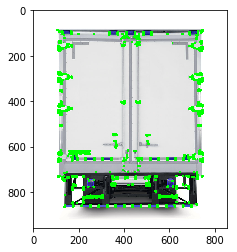

In [26]:
Image_corners = image.copy()
Image_corners[corners_dilate > 0.01 * corners_dilate.max() ] = [0, 255, 0]
plt.imshow(Image_corners, cmap='gray')